In [1]:
import sys
import sklearn
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ensembles"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

# Classificadores de Votação

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[("lr", log_clf), ("rf", rnd_clf), ("svc", svm_clf)],
    voting="hard",
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [4]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


# Bagging e Pasting

## Bagging e pasting na Scikit-Learn

In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=100,
    bootstrap=True,
    n_jobs=-1,
    random_state=42,
)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.904

In [7]:
bag_clf.estimators_[0]

DecisionTreeClassifier(random_state=1952926171)

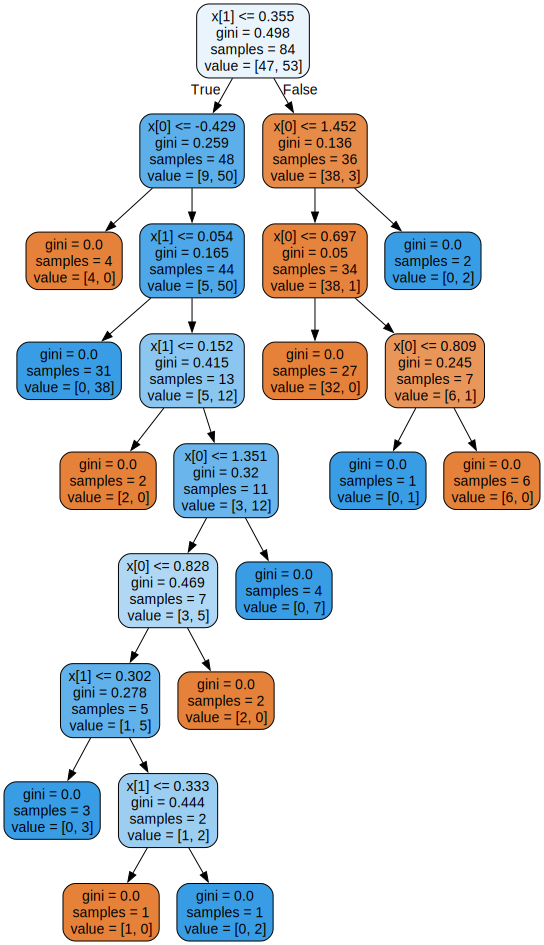

In [8]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
    bag_clf.estimators_[0],
    out_file=os.path.join(IMAGES_PATH, "moons.dot"),
    rounded=True,
    filled=True,
)

Source.from_file(os.path.join(IMAGES_PATH, "moons.dot"))

In [9]:
from matplotlib.colors import ListedColormap


def plot_decision_boundary(
    clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True
):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(["#7d7d58", "#4c4c7f", "#507d50"])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

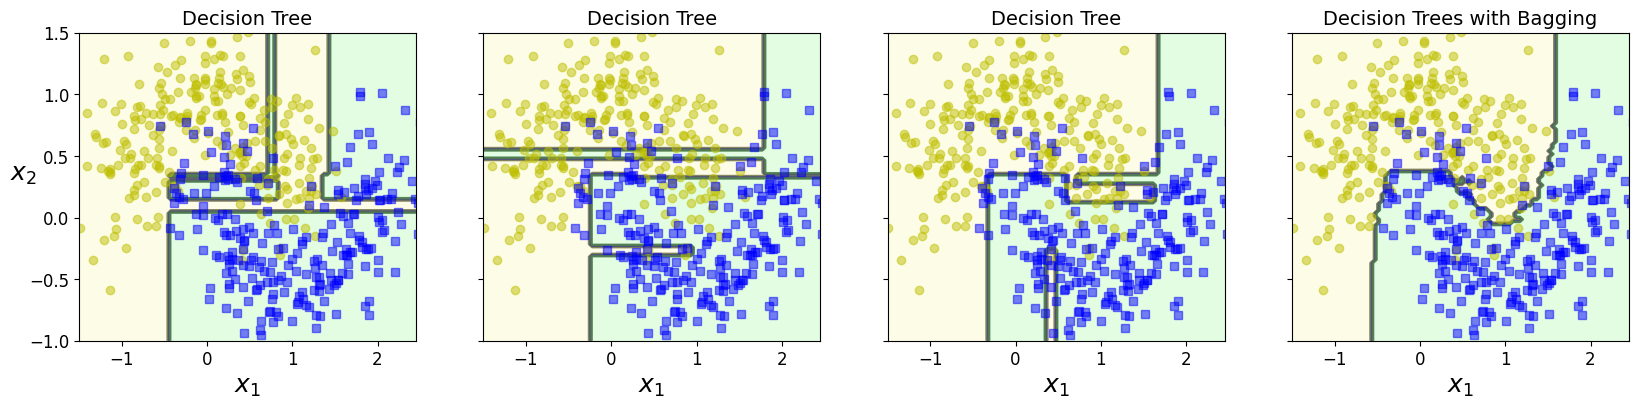

In [10]:
fig, axes = plt.subplots(ncols=4, figsize=(20, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(bag_clf.estimators_[0], X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf.estimators_[1], X, y)
plt.title("Decision Tree", fontsize=14)
plt.ylabel("")
plt.sca(axes[2])
plot_decision_boundary(bag_clf.estimators_[2], X, y)
plt.title("Decision Tree", fontsize=14)
plt.ylabel("")
plt.sca(axes[-1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")
plt.show()

## Avaliação out-of-bag (OOB)

In [11]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    bootstrap=True,
    n_jobs=-1,
    oob_score=True,
    random_state=42,
)

bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.896

# Florestas Aleatórias

In [12]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(
    n_estimators=500,
    max_leaf_nodes=16,
    n_jobs=-1,
    random_state=42,
)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [13]:
accuracy_score(y_test, y_pred_rf)

0.912

In [14]:
rnd_clf.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', max_leaf_nodes=16,
                       random_state=1608637542)

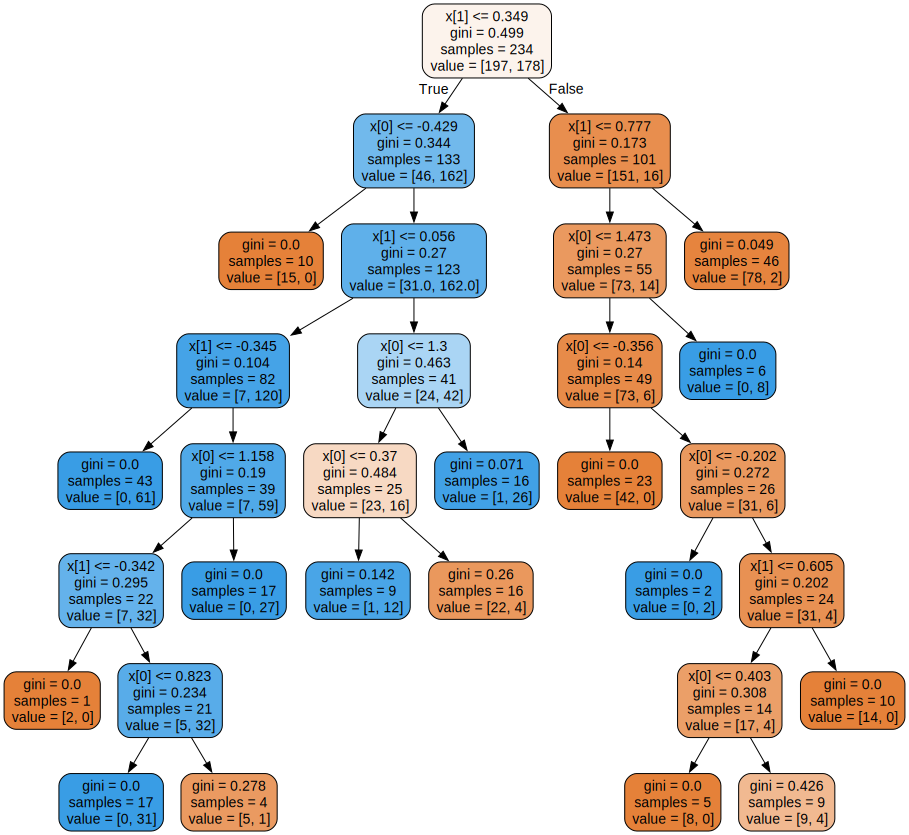

In [15]:
export_graphviz(
    rnd_clf.estimators_[0],
    out_file=os.path.join(IMAGES_PATH, "moons_florest.dot"),
    rounded=True,
    filled=True,
)

Source.from_file(os.path.join(IMAGES_PATH, "moons_florest.dot"))

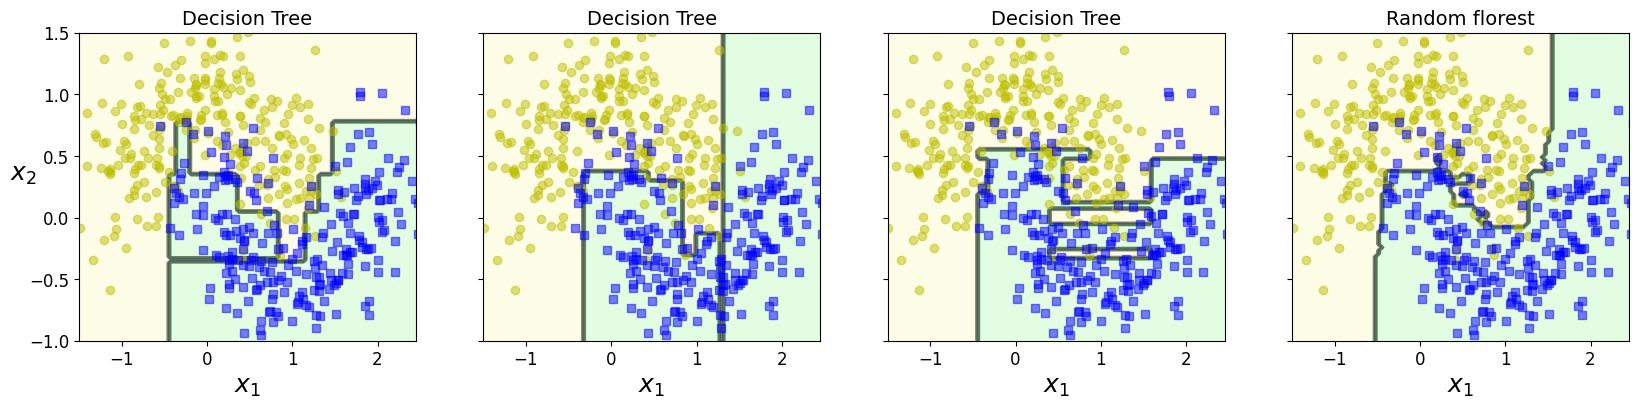

In [16]:
fig, axes = plt.subplots(ncols=4, figsize=(20, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(rnd_clf.estimators_[0], X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(rnd_clf.estimators_[1], X, y)
plt.title("Decision Tree", fontsize=14)
plt.ylabel("")
plt.sca(axes[2])
plot_decision_boundary(rnd_clf.estimators_[2], X, y)
plt.title("Decision Tree", fontsize=14)
plt.ylabel("")
plt.sca(axes[-1])
plot_decision_boundary(rnd_clf, X, y)
plt.title("Random florest", fontsize=14)
plt.ylabel("")
plt.show()

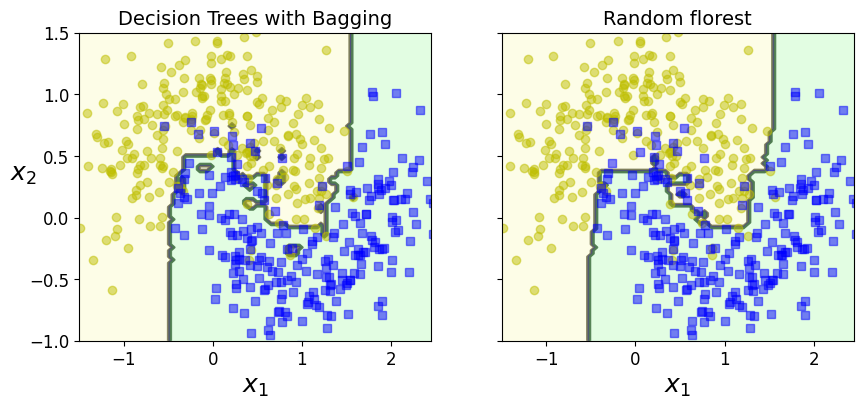

In [17]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)

plt.sca(axes[1])
plot_decision_boundary(rnd_clf, X, y)
plt.title("Random florest", fontsize=14)
plt.ylabel("")

plt.show()

## Importância das características

In [18]:
from sklearn.datasets import load_iris

iris = load_iris()

rnd_clf = RandomForestClassifier(
    n_estimators=500,
    n_jobs=-1,
    random_state=42,
)
rnd_clf.fit(iris["data"], iris["target"])

for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


# Boosting

## AdaBoost

In [20]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200,
    algorithm="SAMME.R",
    learning_rate=0.5,
    random_state=42,
)
ada_clf.fit(X_train, y_train)

d:\python_projects\estudos_de_dados\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

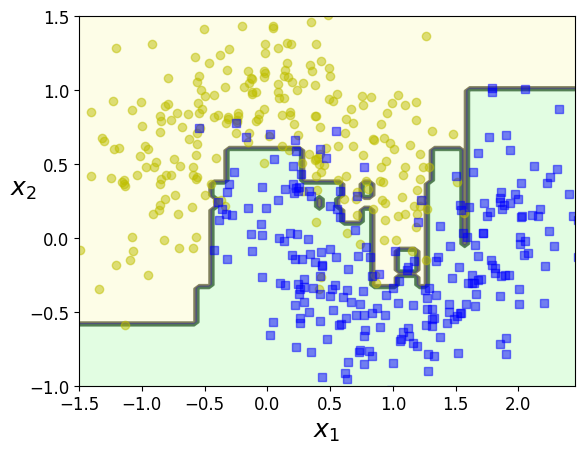

In [21]:
plot_decision_boundary(ada_clf, X, y)

## Gradiente boosting

In [22]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0] ** 2 + 0.05 * np.random.randn(100)

In [23]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

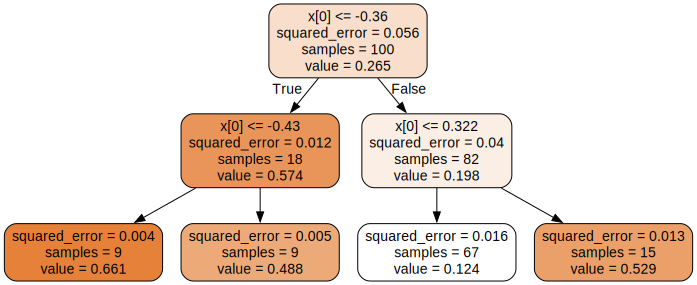

In [24]:
export_graphviz(
    tree_reg1,
    out_file=os.path.join(IMAGES_PATH, "tree_reg1.dot"),
    rounded=True,
    filled=True,
)

Source.from_file(os.path.join(IMAGES_PATH, "tree_reg1.dot"))

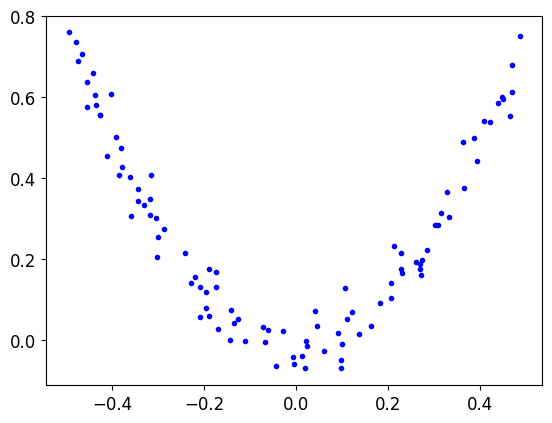

In [29]:
plt.plot(X, y, "b.")

In [33]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

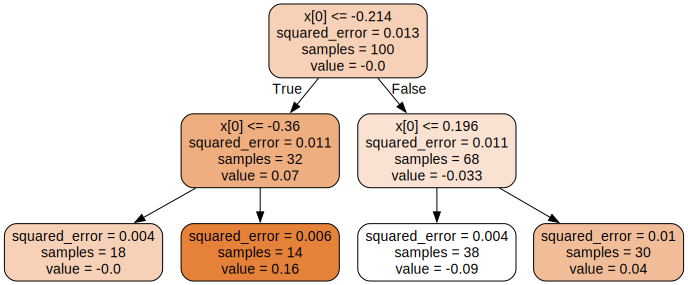

In [34]:
export_graphviz(
    tree_reg2,
    out_file=os.path.join(IMAGES_PATH, "tree_reg2.dot"),
    rounded=True,
    filled=True,
)

Source.from_file(os.path.join(IMAGES_PATH, "tree_reg2.dot"))

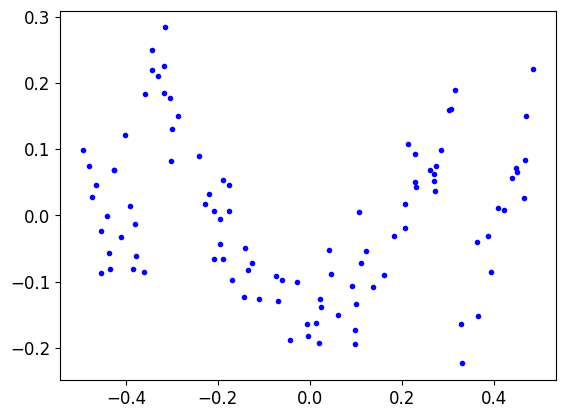

In [35]:
plt.plot(X, y2, "b.")

In [36]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [37]:
X_new = np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
y_pred

array([0.75026781])

In [25]:
def plot_predictions(
    regressors,
    X,
    y,
    axes,
    label=None,
    style="r-",
    data_style="b.",
    data_label=None,
):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(
        regressor.predict(x1.reshape(-1, 1)) for regressor in regressors
    )
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

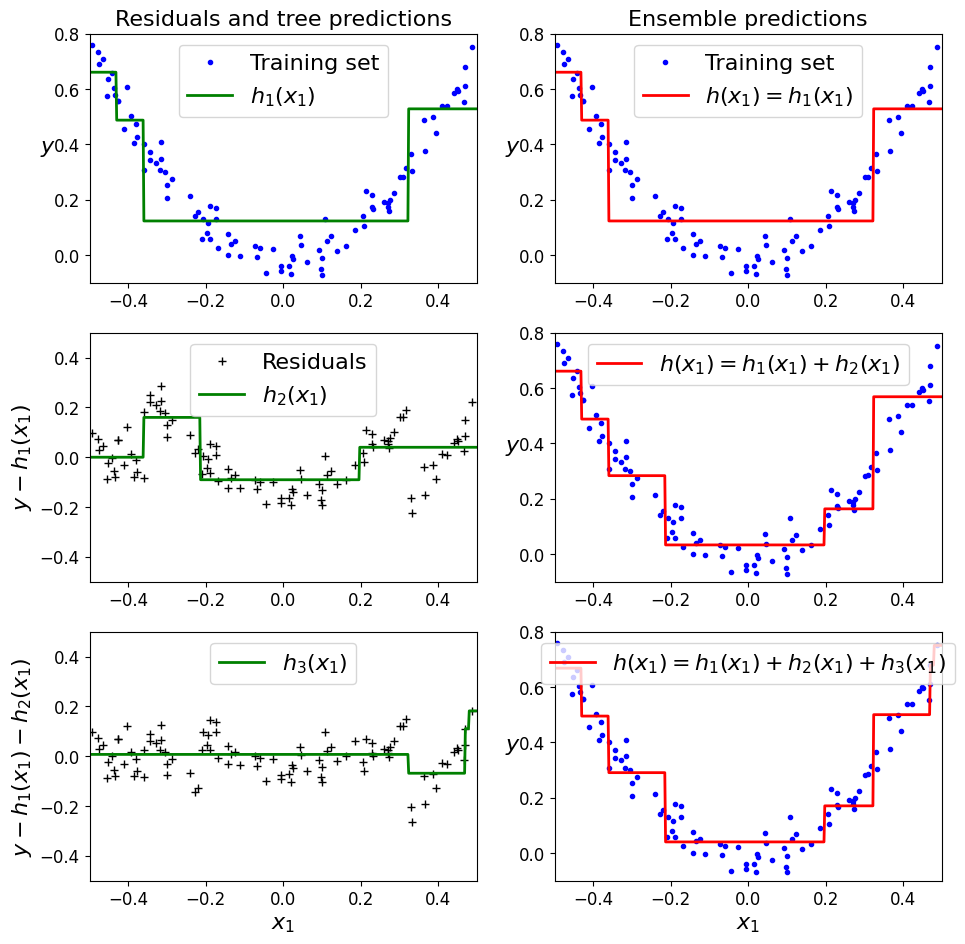

In [40]:
plt.figure(figsize=(11, 11))

plt.subplot(321)
plot_predictions(
    [tree_reg1],
    X,
    y,
    axes=[-0.5, 0.5, -0.1, 0.8],
    label="$h_1(x_1)$",
    style="g-",
    data_label="Training set",
)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions(
    [tree_reg1],
    X,
    y,
    axes=[-0.5, 0.5, -0.1, 0.8],
    label="$h(x_1) = h_1(x_1)$",
    data_label="Training set",
)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions(
    [tree_reg2],
    X,
    y2,
    axes=[-0.5, 0.5, -0.5, 0.5],
    label="$h_2(x_1)$",
    style="g-",
    data_style="k+",
    data_label="Residuals",
)
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions(
    [tree_reg1, tree_reg2],
    X,
    y,
    axes=[-0.5, 0.5, -0.1, 0.8],
    label="$h(x_1) = h_1(x_1) + h_2(x_1)$",
)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions(
    [tree_reg3],
    X,
    y3,
    axes=[-0.5, 0.5, -0.5, 0.5],
    label="$h_3(x_1)$",
    style="g-",
    data_style="k+",
)
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions(
    [tree_reg1, tree_reg2, tree_reg3],
    X,
    y,
    axes=[-0.5, 0.5, -0.1, 0.8],
    label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$",
)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

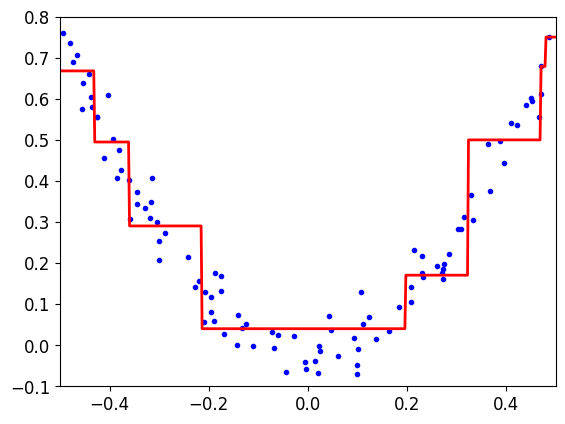

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=3,
    learning_rate=1.0,
    random_state=42,
)
gbrt.fit(X, y)
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], style="r-")

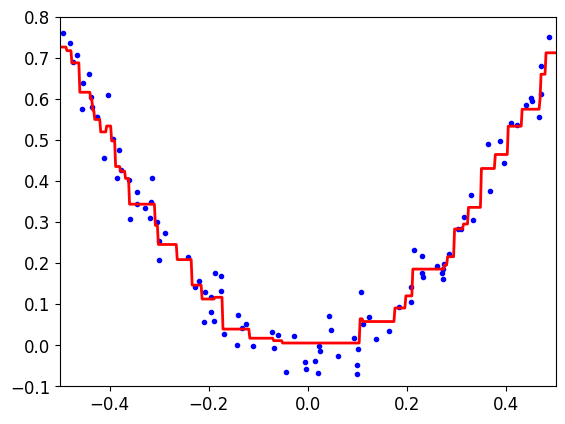

In [47]:
gbrt2 = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=50,
    learning_rate=0.1,
    random_state=42,
)
gbrt2.fit(X, y)
plot_predictions([gbrt2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], style="r-")

In [48]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(
    max_depth=2, n_estimators=120, random_state=42
)
gbrt.fit(X_train, y_train)

errors = [
    mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)
]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(
    max_depth=2, n_estimators=bst_n_estimators, random_state=42
)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=np.int64(56),
                          random_state=42)